Import all the packages that we need during the project

In [52]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm, datasets

Let's start with loading dataset, in order to implement it we define function load_data

In [53]:
def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y

In [54]:
# load dataset
X, y = load_data("data/data_nonlinear.txt")

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

Let's build support vector machine model.Here we set the kernel = rbf (gaussian radial basis function kernel) which enables us to fit a non-linear support vector machine. Then, we fit our model on train set using fit()

In [56]:
clf_rbf = svm.SVC(kernel = 'rbf', C = 10)

clf = clf_rbf.fit(X_train, y_train)

In [57]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [58]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


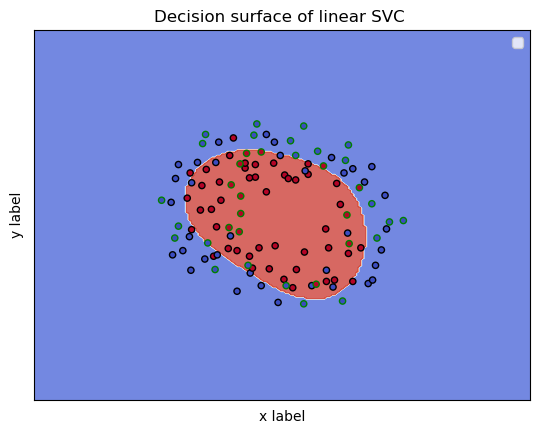

In [59]:

fig, ax = plt.subplots()

# Set-up grid for plotting.
X0, X1 = X_train[:, 0], X_train[:, 1]
X2, X3 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X[:, 0], X[:, 1])

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.scatter(X2, X3, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='g')
ax.set_ylabel('y label')
ax.set_xlabel('x label')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decision surface of linear SVC ')
ax.legend()
plt.show()

It  the above plot, 

red points encircled with black color - accepted microchips on training data

red points encircled with yellow color - accepted microchips on test data

blue points encircled with black color - rejected microchips on training data

blue points encircled with yellow color - rejected microchips on test data

We can perform prediction on the test set using predict() and compute the accuracy of the model

In [60]:
#Compute accuracy on our training set
y_pred = clf_rbf.predict(X_test)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 86.11111111111111
